# Heart-stroke prediction

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import libraries

In [183]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer

# Read in the Dataset

In [184]:
df = pd.read_csv('heart.csv')

In [185]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [186]:
df.shape

(303, 14)

# EDA

In [187]:
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Data Pre-processing

In [189]:
df.duplicated().sum()

1

In [190]:
df.drop_duplicates(inplace=True)

In [191]:
df.duplicated().sum()

0

In [192]:
for col in df.select_dtypes('int'):
    print(df[col].value_counts(), '\n\n')

58    19
57    17
54    16
59    14
52    13
51    12
62    11
56    11
44    11
60    11
41    10
64    10
67     9
63     9
43     8
55     8
42     8
61     8
65     8
53     8
45     8
50     7
48     7
46     7
66     7
47     5
49     5
70     4
39     4
68     4
35     4
71     3
40     3
69     3
34     2
37     2
38     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64 


1    206
0     96
Name: sex, dtype: int64 


0    143
2     86
1     50
3     23
Name: cp, dtype: int64 


120    37
130    36
140    32
110    19
150    17
128    12
138    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: t

In [193]:
df['thal'].value_counts()

2    165
3    117
1     18
0      2
Name: thal, dtype: int64

In [194]:
df.drop(df[df['thal']==0].index, inplace=True)

In [195]:
df['thal'].value_counts()

2    165
3    117
1     18
Name: thal, dtype: int64

<AxesSubplot:>

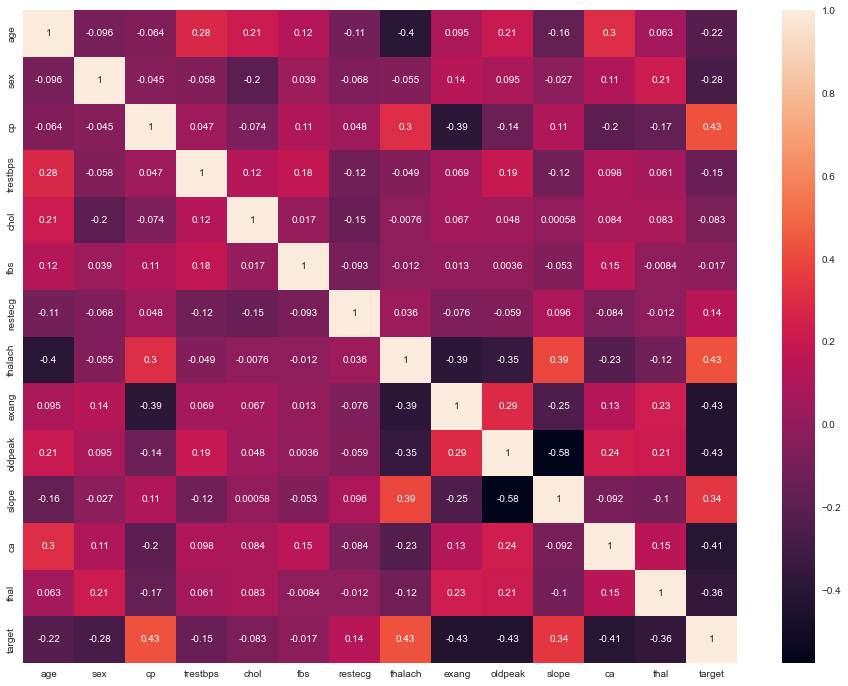

In [196]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True)

In [197]:
X = df.drop('target', axis=1)
y = df.target

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [199]:
scaler = MinMaxScaler()

In [200]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement kNN

In [201]:
knn = KNeighborsClassifier(n_neighbors=1)

In [202]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [203]:
knn_pred = knn.predict(X_test_scaled)

In [204]:
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

[[33  6]
 [11 40]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        39
           1       0.87      0.78      0.82        51

    accuracy                           0.81        90
   macro avg       0.81      0.82      0.81        90
weighted avg       0.82      0.81      0.81        90



In [205]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(1 - recall_score(y_test, pred_i))

Text(0, 0.5, 'Error Rate')

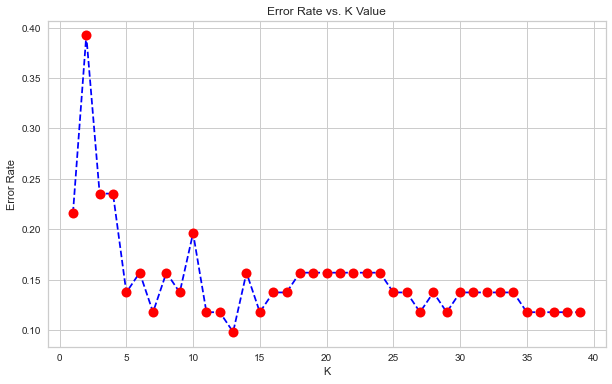

In [206]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [207]:
knn = KNeighborsClassifier(n_neighbors=13)

In [208]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=13)

In [209]:
knn_pred = knn.predict(X_test_scaled)

In [210]:
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

[[30  9]
 [ 5 46]]
              precision    recall  f1-score   support

           0       0.86      0.77      0.81        39
           1       0.84      0.90      0.87        51

    accuracy                           0.84        90
   macro avg       0.85      0.84      0.84        90
weighted avg       0.85      0.84      0.84        90



In [211]:
scores = cross_validate(KNeighborsClassifier(n_neighbors=13), X_train_scaled, y_train, cv=10, n_jobs=-1, scoring=['recall'])

In [212]:
pd.DataFrame(scores)

,fit_time,score_time,test_recall
0,0.002000,0.003998,0.727273
1,0.003996,0.012061,0.727273
2,0.001999,0.003999,1.000000
3,0.003061,0.005997,0.818182
4,0.003000,0.003999,0.818182
5,0.001995,0.009416,0.818182
6,0.001998,0.004785,0.909091
7,0.006416,0.005000,0.909091
8,0.001000,0.004996,0.666667
9,0.002001,0.003995,0.916667


In [213]:
pd.DataFrame(scores)['test_recall'].mean()

0.831060606060606

In [214]:
grid_params = {'weights':['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p':[1, 2], 'leaf_size': [20, 25, 30, 35, 40, 45],
              'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 15, 17], 'metric': ['minkowski', 'manhattan', 'euclidean']}

In [215]:
cv = GridSearchCV(KNeighborsClassifier(n_jobs=-1), param_grid=grid_params, n_jobs=-1, verbose=1, scoring='recall')

In [216]:
cv.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits


GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 25, 30, 35, 40, 45],
                         'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 15,
                                         17],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='recall', verbose=1)

In [217]:
cv.best_score_

0.883399209486166

In [218]:
cv.best_params_

{'algorithm': 'auto',
 'leaf_size': 20,
 'metric': 'minkowski',
 'n_neighbors': 15,
 'p': 1,
 'weights': 'distance'}

In [219]:
knn_pred = cv.predict(X_test_scaled)

In [220]:
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

[[31  8]
 [ 5 46]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.83        39
           1       0.85      0.90      0.88        51

    accuracy                           0.86        90
   macro avg       0.86      0.85      0.85        90
weighted avg       0.86      0.86      0.85        90



In [221]:
knn = KNeighborsClassifier(leaf_size=20, p=1, weights='distance', n_neighbors=15)

In [222]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=15, p=1, weights='distance')

In [223]:
knn_pred = knn.predict(X_test_scaled)

In [224]:
scores = cross_val_score(knn, X_train_scaled, y_train, scoring='recall', cv=10, n_jobs=-1)

In [225]:
pd.DataFrame(scores).mean()

0    0.875758
dtype: float64

In [226]:
knn_recall = recall_score(y_test, knn_pred)

In [227]:
knn_recall

0.9019607843137255

# Logistic Regression

In [228]:
log_model = LogisticRegression(n_jobs=-1)

In [229]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression(n_jobs=-1)

In [230]:
log_pred = log_model.predict(X_test_scaled)

In [231]:
print(confusion_matrix(y_test, log_pred))
print(classification_report(y_test, log_pred))

[[32  7]
 [ 7 44]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        39
           1       0.86      0.86      0.86        51

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.84      0.84      0.84        90



In [232]:
scores = cross_validate(log_model, X_train_scaled, y_train, scoring='recall', cv=10, n_jobs=-1)

In [233]:
pd.DataFrame(scores)

,fit_time,score_time,test_score
0,0.020988,0.001999,0.818182
1,0.018989,0.002000,0.909091
2,0.017989,0.006998,1.000000
3,0.022989,0.001998,0.818182
4,0.019637,0.000000,0.909091
5,0.012640,0.000000,0.636364
6,0.028330,0.002000,1.000000
7,0.033681,0.002997,0.909091
8,0.034681,0.001997,0.666667
9,0.031683,0.001998,0.916667


In [234]:
pd.DataFrame(scores)['test_score'].mean()

0.8583333333333334

In [235]:
log_recall = recall_score(y_test, log_pred)

In [236]:
log_recall

0.8627450980392157

# SVClassifier

In [237]:
sv_model = SVC()

In [238]:
sv_model.fit(X_train_scaled, y_train)

SVC()

In [239]:
sv_pred = sv_model.predict(X_test_scaled)

In [240]:
print(confusion_matrix(y_test, sv_pred))
print(classification_report(y_test, sv_pred))

[[35  4]
 [ 4 47]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        39
           1       0.92      0.92      0.92        51

    accuracy                           0.91        90
   macro avg       0.91      0.91      0.91        90
weighted avg       0.91      0.91      0.91        90



In [241]:
scores = cross_validate(sv_model, X_train_scaled, y_train, cv=10, n_jobs=-1, scoring='recall')

In [242]:
pd.DataFrame(scores)

,fit_time,score_time,test_score
0,0.003998,0.002998,0.636364
1,0.003998,0.002998,0.818182
2,0.004995,0.002998,0.909091
3,0.012992,0.002999,0.818182
4,0.003997,0.001999,0.909091
5,0.002998,0.002997,0.545455
6,0.003997,0.002998,0.909091
7,0.002997,0.002998,0.909091
8,0.002998,0.002999,0.916667
9,0.002999,0.002996,0.916667


In [243]:
pd.DataFrame(scores)['test_score'].mean()

0.8287878787878787

In [244]:
grid_param = {'C':[0.1, 0.3, 0.5, 0.7, 1, 1.5, 2, 2.5, 3],
             'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
             'degree': [1, 2, 3, 4],
             'gamma':[0.1, 0.3, 0.5, 0.7, 1, 1.5, 2, 2.5, 3, 'scale', 'auto'],
             'random_state':[42]}

In [245]:
cv = GridSearchCV(SVC(random_state=42), param_grid=grid_param, n_jobs=-1, scoring='recall')

In [246]:
cv.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 0.3, 0.5, 0.7, 1, 1.5, 2, 2.5, 3],
                         'degree': [1, 2, 3, 4],
                         'gamma': [0.1, 0.3, 0.5, 0.7, 1, 1.5, 2, 2.5, 3,
                                   'scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'random_state': [42]},
             scoring='recall')

In [247]:
cv.best_score_

1.0

In [248]:
cv.best_params_

{'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly', 'random_state': 42}

In [249]:
cv.best_estimator_

SVC(C=0.1, degree=1, gamma=0.1, kernel='poly', random_state=42)

In [250]:
sv_pred = cv.predict(X_test_scaled)

In [251]:
print(confusion_matrix(y_test, sv_pred))
print(classification_report(y_test, sv_pred))

[[ 9 30]
 [ 0 51]]
              precision    recall  f1-score   support

           0       1.00      0.23      0.38        39
           1       0.63      1.00      0.77        51

    accuracy                           0.67        90
   macro avg       0.81      0.62      0.57        90
weighted avg       0.79      0.67      0.60        90



In [252]:
svc_tuned = SVC(C=0.1, degree=1, gamma=0.1, kernel='poly', random_state=42)

In [253]:
scores = cross_validate(svc_tuned, X_train_scaled, y_train, cv=10, n_jobs=-1, scoring='recall')

In [254]:
pd.DataFrame(scores)

,fit_time,score_time,test_score
0,0.003997,0.003997,1.0
1,0.005001,0.002995,1.0
2,0.007997,0.002999,1.0
3,0.006996,0.002999,1.0
4,0.002998,0.002999,1.0
5,0.005006,0.001991,1.0
6,0.003999,0.003000,1.0
7,0.004998,0.002002,1.0
8,0.003997,0.002002,1.0
9,0.003998,0.001999,1.0


In [255]:
sv_recall = recall_score(y_test, sv_pred)

In [256]:
sv_recall

1.0

# Visually Compare Model Scores

In [257]:
plt.figure(figsize=(10, 6))

rec_df = pd.DataFrame({'knn_recall_score': knn_recall,
              'support_vector_recall_score': sv_recall,
              'log_reg_recall_score': log_recall}, index=[0])

<Figure size 720x432 with 0 Axes>

In [258]:
rec_df

,knn_recall_score,support_vector_recall_score,log_reg_recall_score
0,0.901961,1.0,0.862745


<AxesSubplot:>

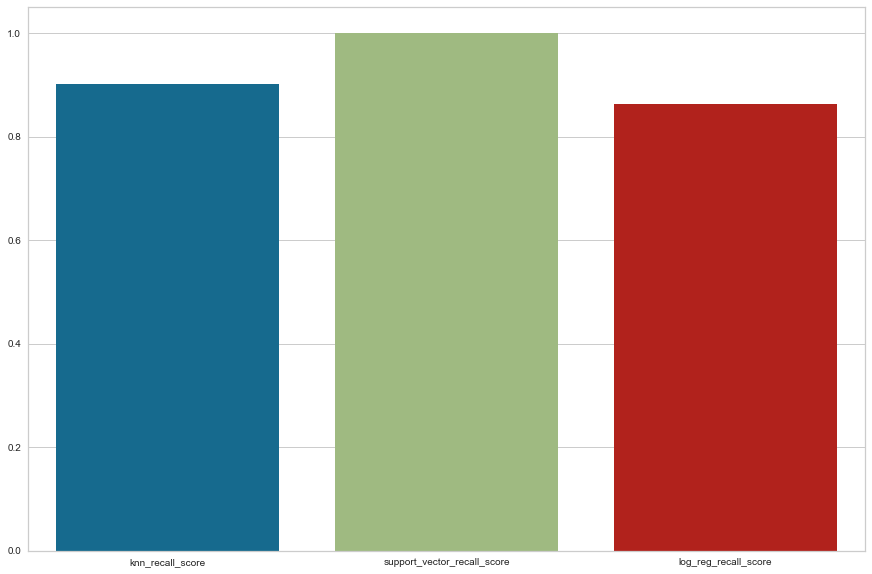

In [259]:
plt.figure(figsize=(15, 10))
sns.barplot(x=rec_df.columns, y=rec_df.iloc[0].values)